In [2]:
from tree_segment2 import segment
from sklearn.metrics import adjusted_rand_score as ARI
from sklearn.metrics import adjusted_mutual_info_score as AMI
import numpy as np

testingpath=[
    "FORinstance_dataset/CULS/plot_2_annotated.las",
    "FORinstance_dataset/NIBIO/plot_1_annotated.las",
    "FORinstance_dataset/NIBIO/plot_17_annotated.las",
    "FORinstance_dataset/NIBIO/plot_18_annotated.las",
    "FORinstance_dataset/NIBIO/plot_22_annotated.las",
    "FORinstance_dataset/NIBIO/plot_23_annotated.las",
    "FORinstance_dataset/NIBIO/plot_5_annotated.las",
    "FORinstance_dataset/RMIT/test.las",
    "FORinstance_dataset/SCION/plot_31_annotated.las",
    "FORinstance_dataset/SCION/plot_61_annotated.las",
    "FORinstance_dataset/TUWIEN/test.las"
    ]

import os
for path in testingpath:
    print(f"Segmenting: {path}")
    predicted_labels, true_labels, ari, ami = segment(path)
    print(f"Adjusted rand score: {ARI(true_labels,predicted_labels)}")
    print(f"Adjusted mutual info score: {AMI(true_labels,predicted_labels)}")
    print()
    save_path = os.path.join("results", path.split("/")[-2],path.split("/")[-1][:-4])
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    np.save(os.path.join(save_path,"predicted_labels.npy"),predicted_labels)
    np.save(os.path.join(save_path,"true_labels.npy"),true_labels)
    np.save(os.path.join(save_path,"ari.npy"),ari)
    np.save(os.path.join(save_path,"ami.npy"),ami)

Segmenting: FORinstance_dataset/CULS/plot_2_annotated.las


100%|██████████| 1252762/1252762 [03:26<00:00, 6069.76it/s]


Adjusted rand score: 0.44365673929510563
Adjusted mutual info score: 0.6678917422772335

Segmenting: FORinstance_dataset/NIBIO/plot_1_annotated.las


100%|██████████| 2349911/2349911 [09:12<00:00, 4254.62it/s]


Adjusted rand score: 0.10460364396419036
Adjusted mutual info score: 0.286769168529309

Segmenting: FORinstance_dataset/NIBIO/plot_17_annotated.las


100%|██████████| 2610198/2610198 [09:08<00:00, 4762.67it/s]


Adjusted rand score: 0.1483737767352117
Adjusted mutual info score: 0.3554306171827226

Segmenting: FORinstance_dataset/NIBIO/plot_18_annotated.las


100%|██████████| 2064772/2064772 [07:18<00:00, 4706.85it/s]


Adjusted rand score: 0.09575722310304025
Adjusted mutual info score: 0.33764694506396326

Segmenting: FORinstance_dataset/NIBIO/plot_22_annotated.las


100%|██████████| 2234385/2234385 [07:28<00:00, 4985.85it/s]


Adjusted rand score: 0.2005722949835961
Adjusted mutual info score: 0.46630260021642767

Segmenting: FORinstance_dataset/NIBIO/plot_23_annotated.las


100%|██████████| 2264782/2264782 [09:12<00:00, 4098.85it/s]


Adjusted rand score: 0.1480891486334424
Adjusted mutual info score: 0.3601922555980085

Segmenting: FORinstance_dataset/NIBIO/plot_5_annotated.las


100%|██████████| 1820639/1820639 [05:55<00:00, 5118.21it/s]


Adjusted rand score: 0.25694422335325157
Adjusted mutual info score: 0.5100952227443518

Segmenting: FORinstance_dataset/RMIT/test.las


100%|██████████| 127556/127556 [00:30<00:00, 4248.15it/s]


Adjusted rand score: 0.46989100523185906
Adjusted mutual info score: 0.6861986439685397

Segmenting: FORinstance_dataset/SCION/plot_31_annotated.las


100%|██████████| 2028347/2028347 [06:25<00:00, 5267.38it/s]


Adjusted rand score: 0.03065468455185173
Adjusted mutual info score: 0.2589673540032727

Segmenting: FORinstance_dataset/SCION/plot_61_annotated.las


100%|██████████| 2103561/2103561 [07:28<00:00, 4694.75it/s]


Adjusted rand score: 0.08229829391719723
Adjusted mutual info score: 0.2237799536562223

Segmenting: FORinstance_dataset/TUWIEN/test.las


100%|██████████| 981230/981230 [03:22<00:00, 4853.04it/s]


Adjusted rand score: 0.25064633804039177
Adjusted mutual info score: 0.45965517738451994



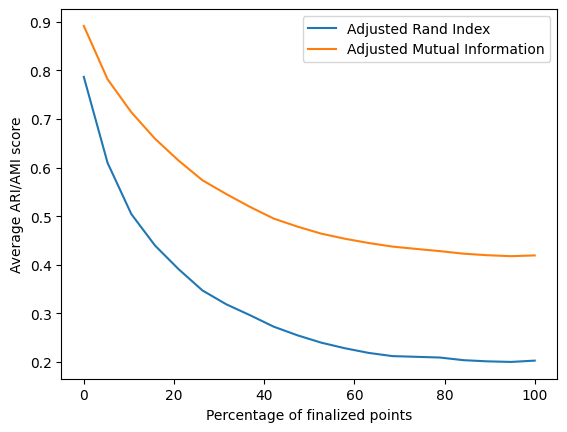

In [ ]:
import matplotlib.pyplot as plt

# plot for mean ARI and AMI
path = "results"
ari_s = np.zeros(20)
ami_s = np.zeros(20)
c = 0
for type in os.listdir(path):
    type_path = os.path.join(path,type)
    for plot in os.listdir(type_path):
        full_path = os.path.join(type_path,plot)
        ari = np.load(os.path.join(full_path,"ari.npy"))
        ami = np.load(os.path.join(full_path,"ami.npy"))
        ari_s += ari
        ami_s += ami
        c += 1

plt.plot(np.linspace(0,100,20),ari_s/c)
plt.plot(np.linspace(0,100,20),ami_s/c)
plt.legend(["Adjusted Rand Index","Adjusted Mutual Information"])
plt.xlabel("Percentage of finalized points")
plt.ylabel("Average ARI/AMI score")
plt.show()
